
# Linear Regression

First we want to see how Linear Regression behaves for different deegres of polynomial features.
For that purpose, we first load our data.

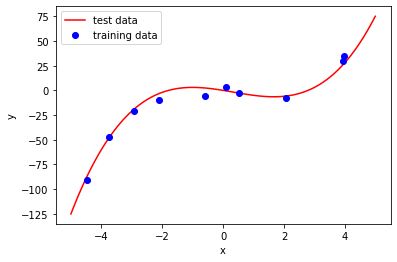

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Load data

training_data = np.load('training_data.npy')
test_data = np.load('test_data.npy')

test_data_x = test_data[:, 0]
test_data_y = test_data[:, 1]

training_data_x = training_data[:, 0]
training_data_y = training_data[:, 1]

# Visualize data
plt.plot(test_data_x, test_data_y, 'r')
plt.plot(training_data_x, training_data_y, 'ob')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["test data", "training data"])

## Create Polynomial Features and Calculate Weights

Remember equation 
$ \boldsymbol{w}^* = \left(\boldsymbol{X}^{T} \boldsymbol{X}\right)^{-1}\boldsymbol{X} \boldsymbol{y}, $ to calculate the weights for linear regression,
where $\boldsymbol{X}$ is the polynomial feature matrix (also called data matrix and sometimes stated as $ \boldsymbol{\Phi} $). We will calculate the weights for different polynomial degrees with this equation.



Text(0, 0.5, 'y')

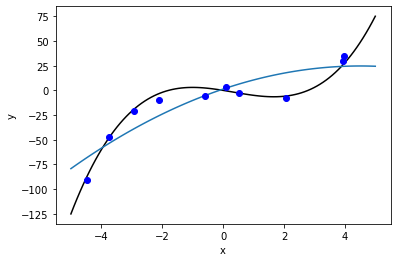

In [2]:
# Function to create Feature Matrix
def get_polynomial_features(data: np.ndarray, degree:float) ->np.ndarray:
    """
    :param data: data points you want to evaluate the polynomials 
    :param degree: degree of your polynomial
    :return features: feature matrix 
    Extends the feature matrix according to the matrix form discussed in the lectures. 
    """
    features = np.ones(data.shape)
    for i in range(degree):
        features = np.column_stack((features, data**(i+1)))
    return features


# Function to Calculate Regression weights
def calc_weights(X: np.ndarray, y: np.ndarray)->np.ndarray:
    """
    :param X: Feature Matrix 
    :param y: output values
    Calculates the weights according to the before mentioned equation
    """
    return np.dot(np.linalg.solve(np.dot(X.T, X), X.T), y)

# Calculation example for one case of polynomial featuers:
degree = 2
poly_feat_train = get_polynomial_features(training_data_x, degree)
poly_feat_test = get_polynomial_features(test_data_x, degree)
w_poly = calc_weights(poly_feat_train, training_data_y)

# Let's plot this specific example

x = np.linspace(-5, 5, 100)
y_pred = np.dot(get_polynomial_features(x, degree), w_poly)

vis_plot_example = plt.figure()
plt.figure(vis_plot_example.number)
plt.plot(test_data_x, test_data_y, 'black')
plt.plot(x, y_pred)
plt.plot(training_data_x, training_data_y, 'ob')
plt.xlabel('x')
plt.ylabel('y')


Practical Aspect: Normaly we would transform the input data into zero mean unit variance distribution e.g. by whitening. This generally has numerical advantages compared to directly using the data as it is.

Let's calculate the feature matrices and weights for different degrees 

In [3]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Create different Features for training- and test data 

poly_features_train = []
poly_features_test = []

for i in degrees:
    poly_features_train.append(get_polynomial_features(training_data_x, i))
    poly_features_test.append(get_polynomial_features(test_data_x, i))

# Calculate the weights 

w_poly_list = []

for feat_mat in poly_features_train:
    w_poly_list.append(calc_weights(feat_mat, training_data_y))



### Model Evaluation

We now want to evaluate our created models. For that we have to define a metric which we use to measure every model's performance.




In [4]:
def eval(Phi:np.ndarray, w:np.ndarray)->np.ndarray:
    """
    : param Phi: Feature matrix
    : param w: weight vector
    Evaluates your model
    """
    return np.dot(Phi, w)

def mse(y_target:np.ndarray, y_pred:np.ndarray)->np.ndarray:
    """
    :param y_target: the target outputs, which we want to have
    :param y_pred: the predicted outputs
    :return : The Mean Squared Error
    """
    dif = y_target - y_pred
    return np.sum(dif ** 2, axis=0) / y_pred.shape[0]



### Let's Evaluate some Models for Polynomial Features

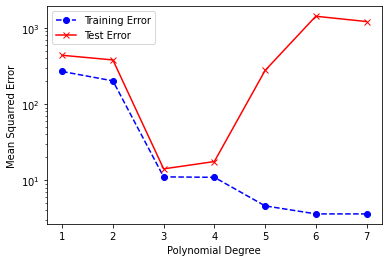

In [5]:
y_training_poly = []
y_test_poly = []
for i in range(len(poly_features_train)):
    y_training_poly.append(eval(poly_features_train[i], w_poly_list[i]))
    y_test_poly.append(eval(poly_features_test[i], w_poly_list[i]))

test_error_poly = []
training_error_poly = []

for i in range(len(y_training_poly)):
    test_error_poly.append(mse(test_data_y, y_test_poly[i]))
    training_error_poly.append(mse(training_data_y, y_training_poly[i]))

error_plot = plt.figure("Polynomial Featuers Error Plot")
plt.figure(error_plot.number)

# only plot until degree 7, otherwise too messy
plt.yscale('log')
plt.plot(degrees[:7], training_error_poly[:7], linestyle='--', marker='o', color='blue')
plt.yscale('log')
plt.plot(degrees[:7], test_error_poly[:7], marker='x', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squarred Error')
plt.legend(['Training Error','Test Error'])


## Overfitting

Text(0, 0.5, 'y')

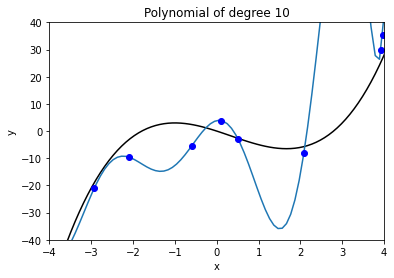

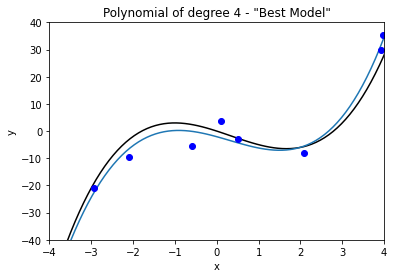

In [6]:
x = np.linspace(-5, 5, 100)

y_pred = []
for i in range(len(degrees)):
    y_pred.append(np.dot(get_polynomial_features(x, i+1), w_poly_list[i]))

y_pred_10 = y_pred[-1]
y_pred_4 = y_pred[3]
y_pred_best = y_pred_4  # pick the model which performs best

overfit_fig_1 = plt.figure()
plt.figure(overfit_fig_1.number)
plt.plot(test_data_x, test_data_y, 'black')

plt.title('Polynomial of degree 10')
plt.plot(x, y_pred_10)
plt.plot(training_data_x, training_data_y,'ob')
plt.xlim(-4,4)
plt.ylim(-40,40)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('overfitting.png')

overfit_fig_2 = plt.figure()
plt.figure(overfit_fig_2.number)
plt.plot(test_data_x, test_data_y, 'black')

plt.title('Polynomial of degree 4 - "Best Model"')
plt.plot(x, y_pred_4)
plt.plot(training_data_x, training_data_y,'ob')
plt.xlim(-4,4)
plt.ylim(-40,40)
plt.xlabel('x')
plt.ylabel('y')

Overfitting can be seen here very clearly. The model for degree 10 fits the data points very precisely (low training error), but does not fit the function porperly (high test error). 